# METAC DATA PREP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
import math
import os
import glob

import pyhgf

# Load Data

- [x] behavioural data (Island Jumping Task)
- [x] slider position logs (IJT)
- [x] physiological data (Island Jumping Task)
- TNUSurvey (and/or REDCap)
    - [x] online prescreening data
    - [x] online questionnaire data 
- REDCap
    - [x] experiment day questionnaires
    - [x] debriefing

In [2]:
# load PPID file

ids = pd.read_csv(r"data\metac_ppids_exploration.txt")

#print(ids['PPID'])
print(ids.size)

# def basedir
#b_basedir = r"T:\METAC\behavior\raw\Temporary" # rawTransfer
b_basedir = r"R:\METAC\behavior\raw" # bluebay

1


In [4]:
# TEMP load slider logui

# path root
l_fname = "behavior\\task\\*.logui"

# init list
f = list()
l_colnames = ['date', 'time', 'ui', 'value']

# loop over ppids
for idx, val in enumerate(ids['PPID']):
    
    # get path to .csv task files
    ppid = "TNU_METAC_" + str(val)
    l_fullpath = os.path.join(b_basedir, ppid, l_fname)
    print(l_fullpath)
    
    # load task data (experiment)
    for l_file in glob.glob(l_fullpath):
        if l_file.find("experiment") != -1:

            print(l_file)
    
            # responses
            l_dat = pd.read_csv(l_file, skiprows=range(6), nrows=5) #, names=l_colnames, header=None)
            print(l_dat.shape)
            print(l_dat.values)


# l_file = r"data\TNU_METAC_9999_breathtest_240624_1029.logui"
# l_colnames = ['date', 'time', 'ui', 'value']

# l_temp = pd.read_csv(l_file, skiprows=range(6), nrows=5) #, names=l_colnames, header=None)
# l_temp.values

R:\METAC\behavior\raw\TNU_METAC_1010\behavior\task\*.logui
R:\METAC\behavior\raw\TNU_METAC_1010\behavior\task\TNU_METAC_1010_experiment_241002_1015.logui
(5, 1)
[['[24/10/02 10:15:43.461] (slider) 0.285']
 ['[24/10/02 10:15:43.476] (slider) 0.288']
 ['[24/10/02 10:15:43.492] (slider) 0.291']
 ['[24/10/02 10:15:43.518] (slider) 0.296']
 ['[24/10/02 10:15:43.555] (slider) 0.299']]


In [5]:
# TEMP load REDCap data

r_basedir = r"P:\METAC_Iglesias\Data"
r_fname = "METAC1_DATA_*.csv"

r_fullpath = os.path.join(r_basedir, r_fname)
r_file = glob.glob(r_fullpath)
print(r_file)

r_temp = pd.read_csv(r_file[0])#, skiprows=range(10), names=p_colnames, header=None)
list(r_temp.columns.values)

['P:\\METAC_Iglesias\\Data\\METAC1_DATA_2024-10-02_1119.csv']


['ppid',
 'redcap_event_name',
 'redcap_repeat_instrument',
 'redcap_repeat_instance',
 'redcap_survey_identifier',
 'ic_sid',
 'ic_screening_no',
 'scheduled_participation',
 'ic_source___1',
 'ic_source___2',
 'ic_source___3',
 'ic_source___4',
 'ic_source___na',
 'ic_source___nad',
 'ic_source___nac',
 'ic_source___nd',
 'ic_source___unk',
 'ic_source___ano',
 'ic_pid',
 'ic_date',
 'ic_time',
 'ic_experimenter',
 'ic_location',
 'ic_version',
 'ic_incidental_findings',
 'ic_inform_doctor',
 'ic_available',
 'ic_included',
 'ic_notes',
 'ic_ae',
 'informed_consent_complete',
 'further_use_source___1',
 'further_use_source___2',
 'further_use_source___3',
 'further_use_source___4',
 'further_use_source___na',
 'further_use_source___nad',
 'further_use_source___nac',
 'further_use_source___nd',
 'further_use_source___unk',
 'further_use_source___ano',
 'fur_use_pid',
 'fur_use_withdrawal_study',
 'fur_use_discontinuation',
 'reason_discontinuation',
 'fur_use_data',
 'fur_use_withdraw

In [6]:
r_temp['ppid']
r_temp['psqi_score']
r_temp['debrief_source_data___4']
r_temp['fas_total_score']
print(r_temp['fas_exp_total_score'])
r_temp['mfis_exp_total_score']

# Create a visualization
# sns.relplot(data=r_temp, x="ppid", y="psqi_score")

0     11.0
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
Name: fas_exp_total_score, Length: 88, dtype: float64


0     3.0
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
83    NaN
84    NaN
85    NaN
86    NaN
87    NaN
Name: mfis_exp_total_score, Length: 88, dtype: float64

In [7]:
# load physiology data
###b_basedir = r"T:\METAC\behavior\raw\Temporary"
p_fname = "behavior\\LabChart\\*task_formatted.csv"
ps_fname = "behavior\\LabChart\\*specs.json"
pf_fname = "behavior\\LabChart\\*task_full.csv"

# loop over ppids
for idx, val in enumerate(ids['PPID']):
    
    # get path to formatted .csv task physiology files
    ppid = "TNU_METAC_" + str(val)
    p_fullpath = os.path.join(b_basedir, ppid, p_fname)
    for p_file in glob.glob(p_fullpath):


        print(str(p_file))

        # p_colnames = ['t', 'M', 'Pulse', 'T', 'O2', 'CO2', 'F', 'V']
        # p_temp = pd.read_csv(p_file, names=p_colnames)
        p_temp = pd.read_csv(p_file)
        
        print(list(p_temp.columns.values))

    
    # get path to specs.json files
    ps_fullpath = os.path.join(b_basedir, ppid, ps_fname)
    for ps_file in glob.glob(ps_fullpath):

        print(str(ps_file))
    
        ps_temp = pd.read_json(ps_file, typ='series')
        print(ps_temp)
    
        print(ps_temp.comment_txt)
        print(ps_temp.comment_t[2])
        print(ps_temp.comment_t[3])


    # pf_fullpath = os.path.join(b_basedir, ppid, pf_fname)
    # for pf_file in glob.glob(pf_fullpath):
    #     print(str(pf_file))
    #     pf_temp = pd.read_csv(pf_file)

R:\METAC\behavior\raw\TNU_METAC_1010\behavior\LabChart\TNU_METAC_1010_task_formatted.csv
['Mouth Pressure', 'Pulse', 'Resistance Trigger', 'O2', 'CO2', 'Spirometer (Flow)', 'Spirometer (Volume)', 'time', 'id']
R:\METAC\behavior\raw\TNU_METAC_1010\behavior\LabChart\TNU_METAC_1010_task_specs.json
rangemin       [-416.3733797117464, -2, -10, -100, -10, -1.15...
rangemax       [420.7820915701583, 2, 10, 100, 10, 1.88309514...
units                 [mmHg, V   , V   , %O2 , %CO2, L/s , L   ]
samplerate            [1000, 1000, 1000, 1000, 1000, 1000, 1000]
comment_t                    [239949, 446749, 466249, 2980749.0]
comment_txt    [start breathing test, stop breathing test , s...
dtype: object
['start breathing test', 'stop breathing test ', 'start experiment    ', 'stop experiment     ']
466249
2980749.0


In [8]:
p_temp

,Mouth Pressure,Pulse,Resistance Trigger,O2,CO2,Spirometer (Flow),Spirometer (Volume),time,id
0,0.595448,-0.009375,0.003125,15.543750,3.602813,-0.458014,0.331441,466.248,1
1,0.595448,-0.010125,0.002813,15.550000,3.603125,-0.457837,0.330983,466.249,1
2,0.608528,-0.010750,0.002813,15.546875,3.603125,-0.458191,0.330524,466.250,1
3,0.608528,-0.011188,0.002500,15.550000,3.602500,-0.458014,0.330066,466.251,1
4,0.608528,-0.011437,0.002500,15.556250,3.603437,-0.458191,0.329608,466.252,1
...,...,...,...,...,...,...,...,...,...
2514496,0.530045,-0.015500,0.002813,20.778126,0.146875,-0.372214,0.670889,2980.744,1
2514497,0.530045,-0.015375,0.003125,20.775000,0.146563,-0.372568,0.670516,2980.745,1
2514498,0.516964,-0.015313,0.003437,20.775000,0.145625,-0.372568,0.670144,2980.746,1
2514499,0.516964,-0.015250,0.003437,20.778126,0.145000,-0.372568,0.669771,2980.747,1


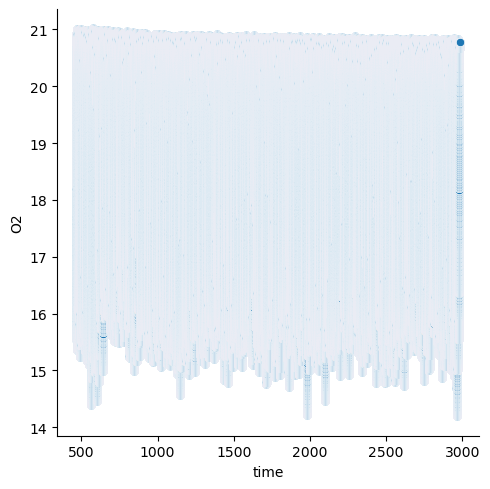

In [9]:
sns.relplot(data=p_temp, x="time", y="O2")

In [3]:
## BEHAVIOURAL DATA

ids = pd.read_csv(r"data\metac_ppids_exploration.txt")

# path root
###b_basedir = r"T:\METAC\behavior\raw\Temporary" # rawTransfer
t_fname = "behavior\\task\\*.csv"
q_basedir = r"R:\METAC\questionnaires\raw" # bluebay ###r"T:\METAC\questionnaires\raw\Temporary"# rawTransfer
q_fname = "OnlineQuestionnaires\\*.csv"

# init list
f = list()

# loop over ppids
for idx, val in enumerate(ids['PPID']):
    
    # get path to .csv task files
    ppid = "TNU_METAC_" + str(val)
    t_fullpath = os.path.join(b_basedir, ppid, t_fname)
    print(t_fullpath)
    
    # load task data (experiment)
    for t_file in glob.glob(t_fullpath):
        if t_file.find("experiment") != -1:

            # aversiveness rating
            try:
                aversiveness = pd.read_csv(t_file, skiprows=range(83))
                av = aversiveness.to_numpy()
            except:
                av = math.nan
    
            print(av)
    
            # task settings
            specifications = pd.read_csv(t_file, nrows=1)
            specifications.insert(0, "pseudo_id", idx) # add sub idx
            specifications.insert(15, "aversiveness", av) # add aversiveness rating
    
            # repeat rows
            n_trials = specifications.values[0,1]
            t_specs80 = pd.DataFrame(np.repeat(specifications.values, n_trials, axis=0))
            t_specs80.columns = specifications.columns
            print(t_specs80.shape)
            
            tmp_specs = specifications.to_numpy()
            tmp_specs = np.repeat(tmp_specs, repeats = n_trials, axis=0)
    
            # responses
            t_dat = pd.read_csv(t_file, skiprows=[0,1,83,84])
            print(t_dat.shape)

    # load questionnaire data
    q_fullpath = os.path.join(q_basedir, ppid, q_fname)
    for q_file in glob.glob(q_fullpath):
        if q_file.find("Questionnaires") != -1:

            print(q_file)
            q_temp = pd.read_csv(q_file)
        
            # repeat rows
            q_dat = q_temp.loc[q_temp.index.repeat(n_trials)].reset_index(drop=True)
            print(q_dat.shape) 

    # concatenate arrays (t_reponses + t_specifications + quest)
    dat = pd.concat([t_dat, t_specs80, q_dat], axis=1)
    print(dat.shape)
    
    # append list for each subject
    f.append(dat)
    

# concatenate data frames from individual subjects
df = pd.concat(f, ignore_index=True)
print(df.shape)

R:\METAC\behavior\raw\TNU_METAC_1010\behavior\task\*.csv
[[0.219941]]
(80, 16)
(80, 12)
R:\METAC\questionnaires\raw\TNU_METAC_1010\OnlineQuestionnaires\TNU_METAC_1010_Questionnaires.csv
(80, 390)
(80, 418)
(80, 418)


In [4]:
print(t_fullpath)
for t_file in glob.glob(t_fullpath):
        if t_file.find("experiment") != -1:

            # aversiveness rating
            try:
                aversiveness = pd.read_csv(t_file, skiprows=range(83))
                av = aversiveness.to_numpy()
            except:
                av = math.nan

print(av)

R:\METAC\behavior\raw\TNU_METAC_1010\behavior\task\*.csv
[[0.219941]]


In [80]:
# internal pilot 09-2024

# init list
f = list()
    
# get path to .csv task files
t_fullpath = r"C:\Users\alhess\Documents\local_data\metac_data_local\internal_pilots\RawTransfer\behavior\TNU_METAC_9001\behavior\task\*.csv"
print(t_fullpath)

# load task data (experiment)
for t_file in glob.glob(t_fullpath):
    if t_file.find("experiment") != -1:

        # aversiveness rating
        try:
            aversiveness = pd.read_csv(t_file, skiprows=range(83))
            av = aversiveness.to_numpy()
        except:
            av = math.nan

        print(av)

        # task settings
        specifications = pd.read_csv(t_file, nrows=1)
        specifications.insert(0, "pseudo_id", idx) # add sub idx
        specifications.insert(15, "aversiveness", av) # add aversiveness rating

        # repeat rows
        n_trials = specifications.values[0,1]
        t_specs80 = pd.DataFrame(np.repeat(specifications.values, n_trials, axis=0))
        t_specs80.columns = specifications.columns
        print(t_specs80.shape)
        
        tmp_specs = specifications.to_numpy()
        tmp_specs = np.repeat(tmp_specs, repeats = n_trials, axis=0)

        # responses
        t_dat = pd.read_csv(t_file, skiprows=[0,1,83,84])
        print(t_dat.shape)


# concatenate arrays (t_reponses + t_specifications + quest)
dat = pd.concat([t_dat, t_specs80], axis=1)
print(dat.shape)

# append list for each subject
f.append(dat)
    

# concatenate data frames from individual subjects
df = pd.concat(f, ignore_index=True)
print(df.shape)

C:\Users\alhess\Documents\local_data\metac_data_local\internal_pilots\RawTransfer\behavior\TNU_METAC_9001\behavior\task\*.csv
[[0.737048]]
(80, 16)
C:\Users\alhess\Documents\local_data\metac_data_local\internal_pilots\RawTransfer\behavior\TNU_METAC_9001\behavior\task\TNU_METAC_9001_experiment_240906_1001.csv
(80, 12)
(80, 28)
(80, 28)


In [5]:
# Seaborn: apply the default theme
sns.set_theme()

# print column names of df
c_names = list(df.columns.values)
print(c_names)

['trial#', ' iWidth', ' iDistance', ' wind', ' jAngle', ' jStrengthFactor', ' jSuccess', ' prediction', ' control', ' handling', ' tStart', ' b1Duration', 'pseudo_id', 'trialNo', ' jumpOnly', ' sequence', ' lang', ' mode', ' angleLimit', ' distanceMin', ' distanceMax', ' widthS', ' widthL', ' jumpStrength', ' windStrength', ' sceneWidth', ' sceneHeight', 'aversiveness', 'id', 'submitdate', 'lastpage', 'startlanguage', 'seed', 'token', 'startdate', 'datestamp', 'studyinfo', 'birthyear', 'gender', 'informedconsent', 'PHQ8[PHQ81]', 'PHQ8[PHQ82]', 'PHQ8[PHQ83]', 'PHQ8[PHQ84]', 'PHQ8[PHQ85]', 'PHQ8[PHQ86]', 'PHQ8[PHQ87]', 'PHQ8[PHQ88]', 'StaitAllQuestions[STAIT01]', 'StaitAllQuestions[STAIT02]', 'StaitAllQuestions[STAIT03]', 'StaitAllQuestions[STAIT04]', 'StaitAllQuestions[STAIT05]', 'StaitAllQuestions[STAIT06]', 'StaitAllQuestions[STAIT07]', 'StaitAllQuestions[STAIT08]', 'StaitAllQuestions[STAIT09]', 'StaitAllQuestions[STAIT10]', 'StaitAllQuestions[STAIT11]', 'StaitAllQuestions[STAIT12]', 

&nbsp;
### Raw Behavioural Responses over trials

- success
- prediction
- control rating

In [6]:
min(df[' prediction'][160:239])

ValueError: min() iterable argument is empty

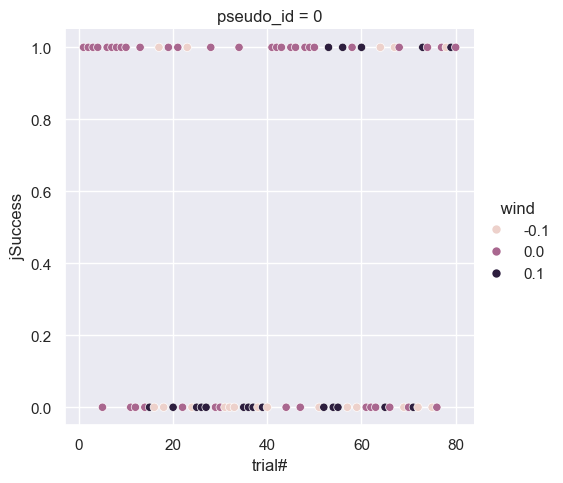

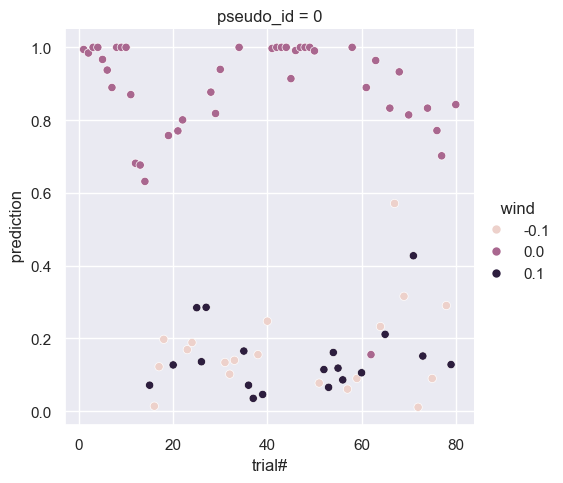

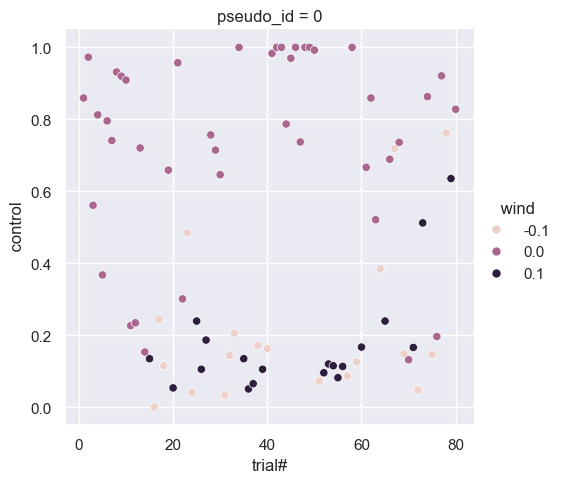

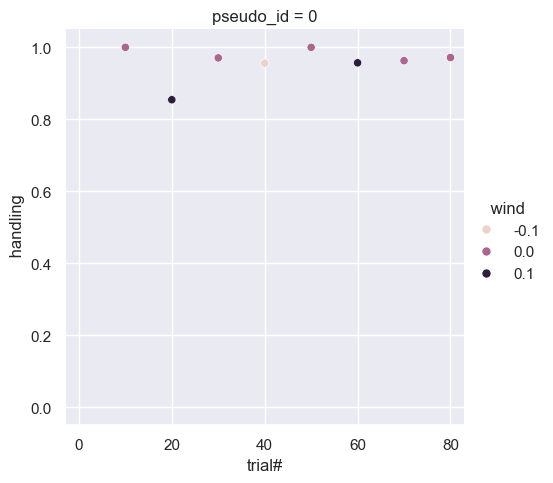

In [43]:
# Create a visualization
fig1 = sns.relplot(data=df, x="trial#", y=" jSuccess", col="pseudo_id", hue=' wind')
fig2 = sns.relplot(data=df, x="trial#", y=" prediction", col="pseudo_id", hue=' wind')
fig3 = sns.relplot(data=df, x="trial#", y=" control", col="pseudo_id", hue=' wind')

df = df.replace(to_replace={' handling': [-1]}, value=np.nan)
fig4 = sns.relplot(data=df, x='trial#', y=' handling', col="pseudo_id", hue=' wind')
fig4.set(xlim=(-3,83), ylim=(-0.05,1.05))

In [44]:
fig1.savefig(r"figures\pilot_behav_raw_success.svg")
fig2.savefig(r"figures\pilot_behav_raw_prediction.svg")
fig3.savefig(r"figures\pilot_behav_raw_control.svg")
fig4.savefig(r"figures\pilot_behav_raw_coping.svg")

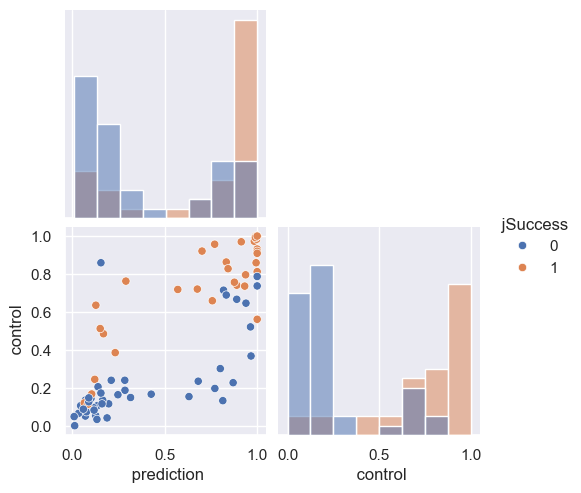

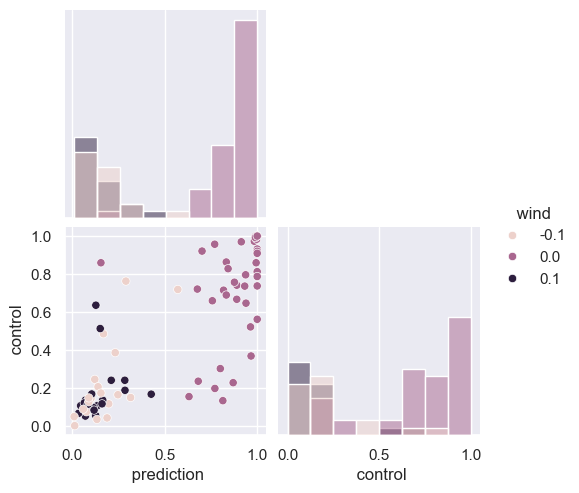

In [22]:
fig5 = sns.pairplot(data=df, 
             vars=[" prediction", " control"], 
            hue=" jSuccess",
            diag_kind="hist",
            corner=True)
fig6 = sns.pairplot(data=df, 
             vars=[" prediction", " control"], 
            hue=" wind",
            diag_kind="hist",
            corner=True)

In [23]:
fig5.savefig(r"figures\pilot_behav_raw_ControlvPrediction_by_success.svg")
fig6.savefig(r"figures\pilot_behav_raw_ControlvPrediction_by_wind.svg")

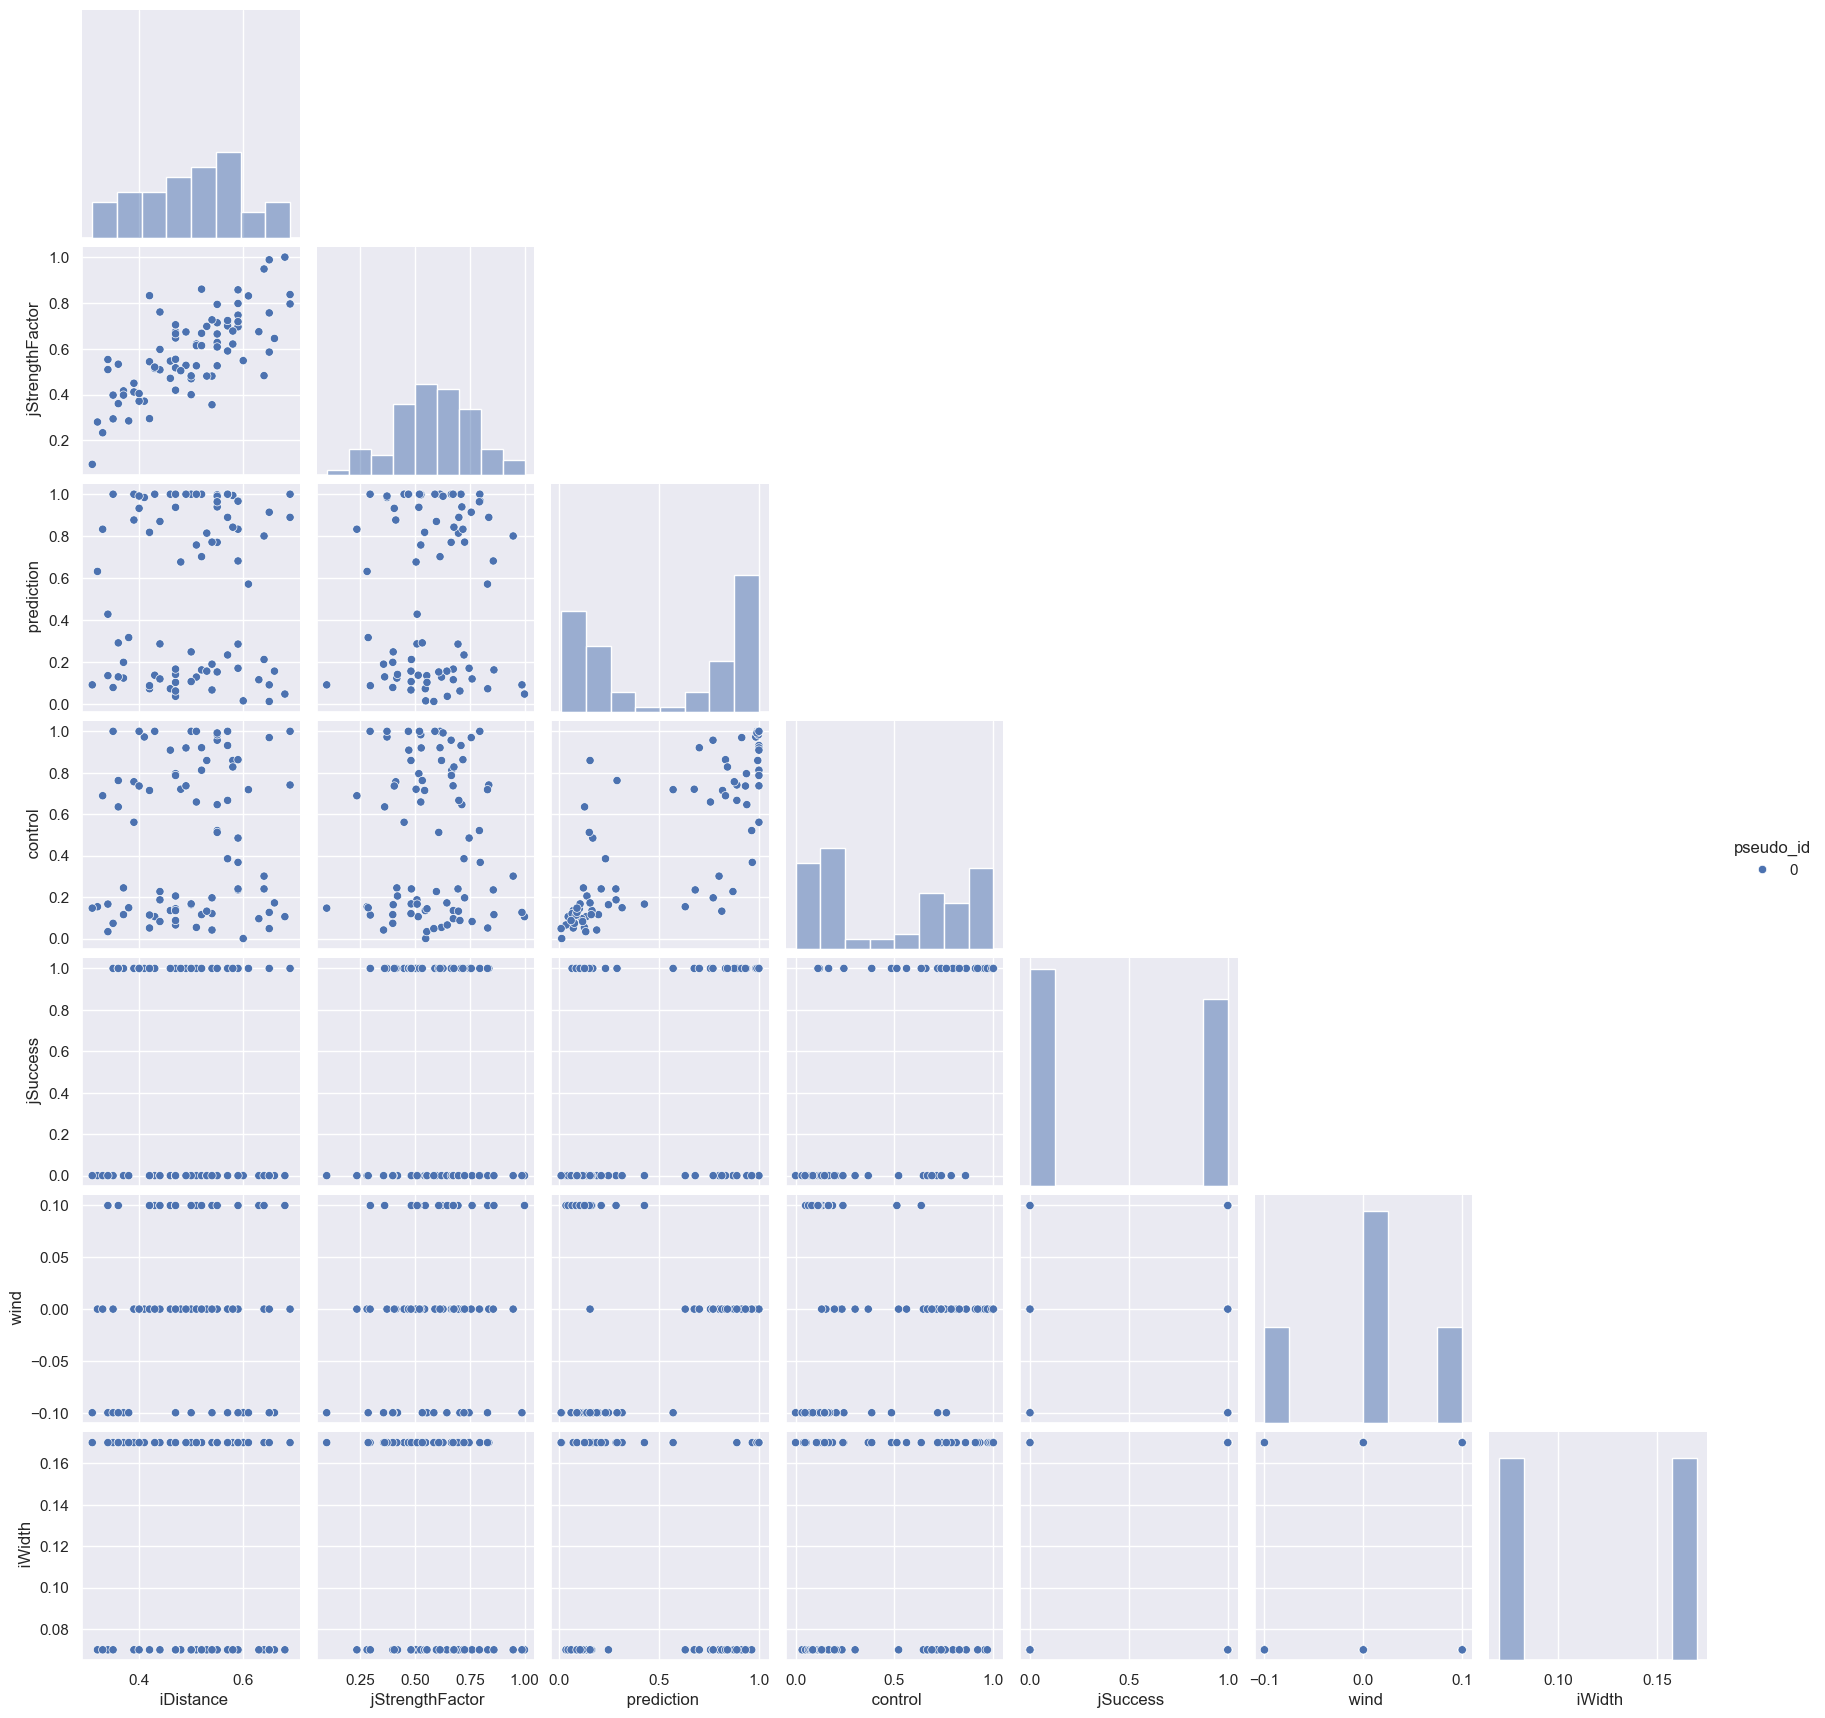

In [47]:
sns.pairplot(data=df, vars=[' iDistance', ' jStrengthFactor', ' prediction', ' control', ' jSuccess', ' wind', ' iWidth'], 
             hue='pseudo_id', diag_kind="hist",
            corner=True)

### Dependence of subsequent responses

internal pilots:
- button box ids 0-2
- slider ids 3-5


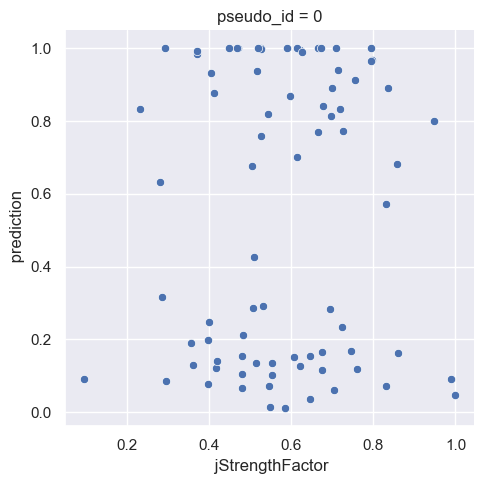

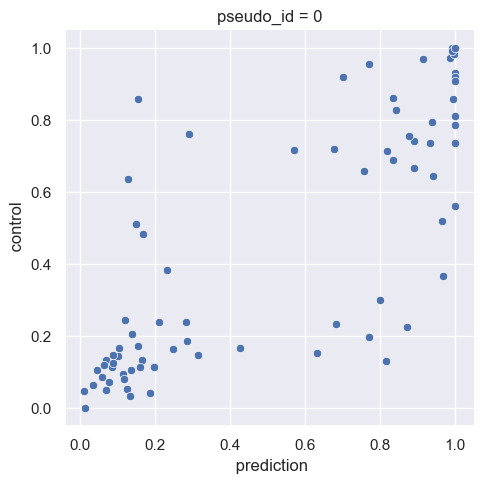

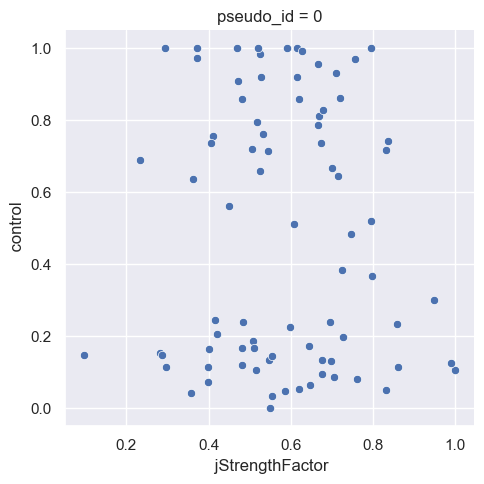

In [15]:
# Create a visualization of subsequent responses
sns.relplot(data=df, x=" jStrengthFactor", y=" prediction", col="pseudo_id")
sns.relplot(data=df, x=" prediction", y=" control", col="pseudo_id")
sns.relplot(data=df, x=" jStrengthFactor", y=" control", col="pseudo_id")

### Average responses (across sub) over trials

C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

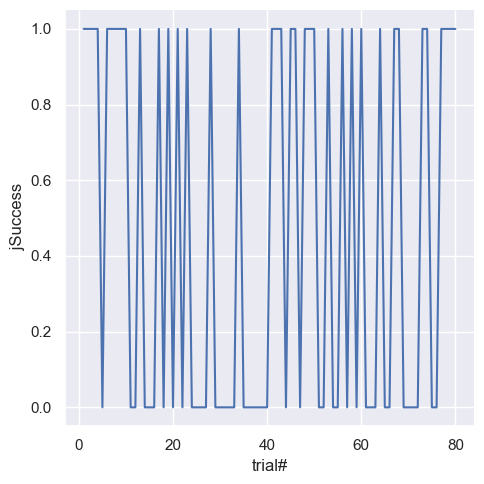

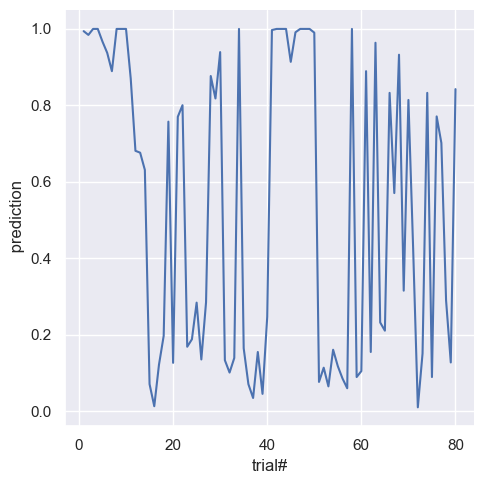

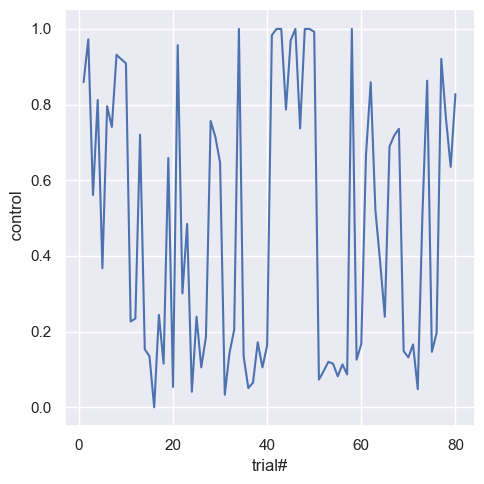

In [16]:
# Avg success (across sub) over trials
sns.relplot(data=df, kind="line", x="trial#", y=" jSuccess")

# Avg prediction (across sub) over trials
sns.relplot(data=df, kind="line", x="trial#", y=" prediction")

# Avg control rating (across sub) over trials
sns.relplot(data=df, kind="line", x="trial#", y=" control")

### Distribution of task performance and responses

C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a le

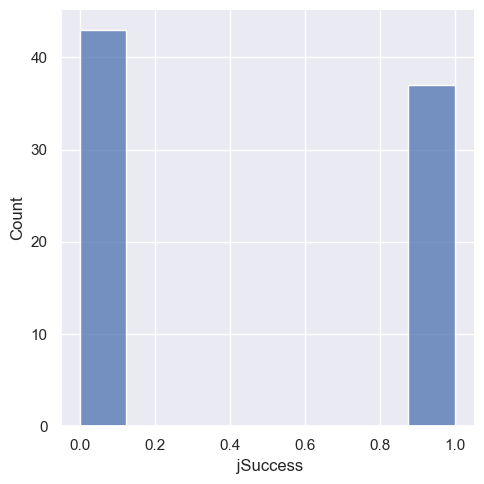

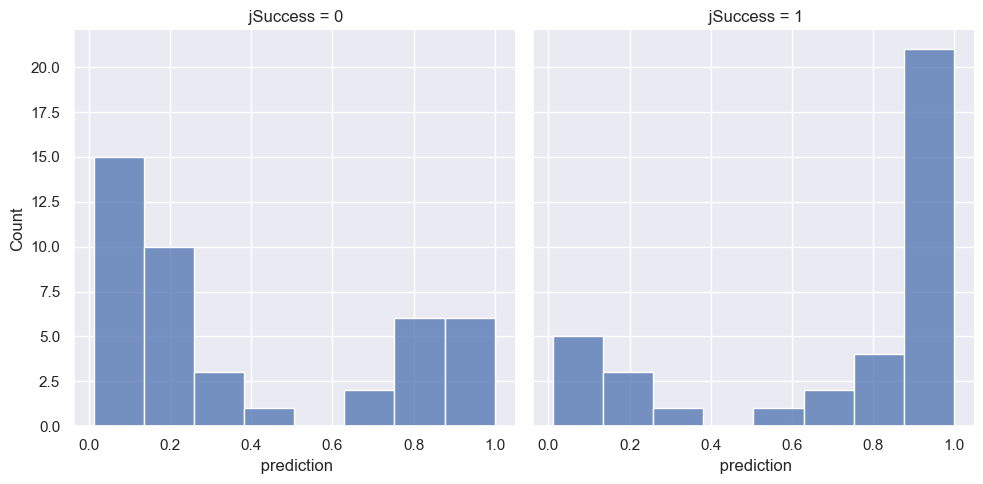

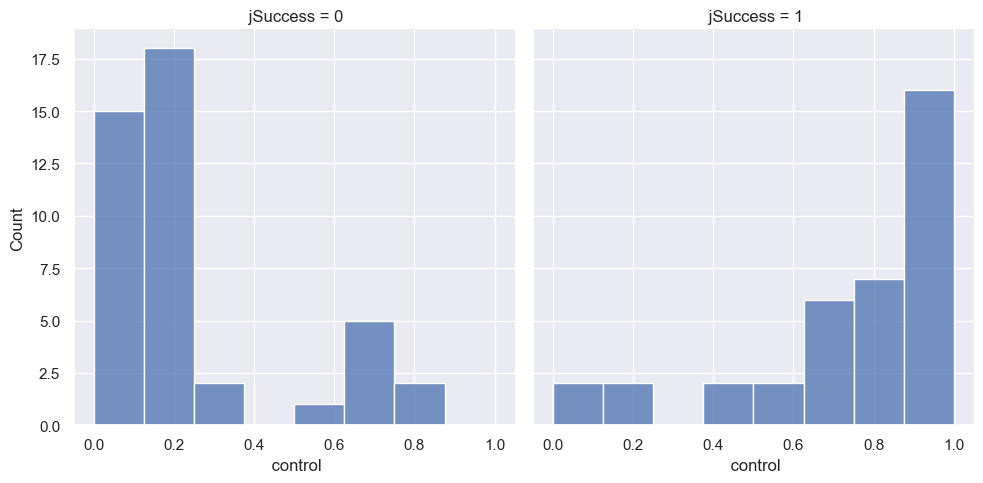

In [17]:
# distr of success/failures
sns.displot(data=df, x=" jSuccess")

# distr of predictions 
sns.displot(data=df, x=" prediction", col=" jSuccess")

# distr of control ratings
sns.displot(data=df, x=" control", col=" jSuccess")

&nbsp;
___
# Questionnaire data


C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

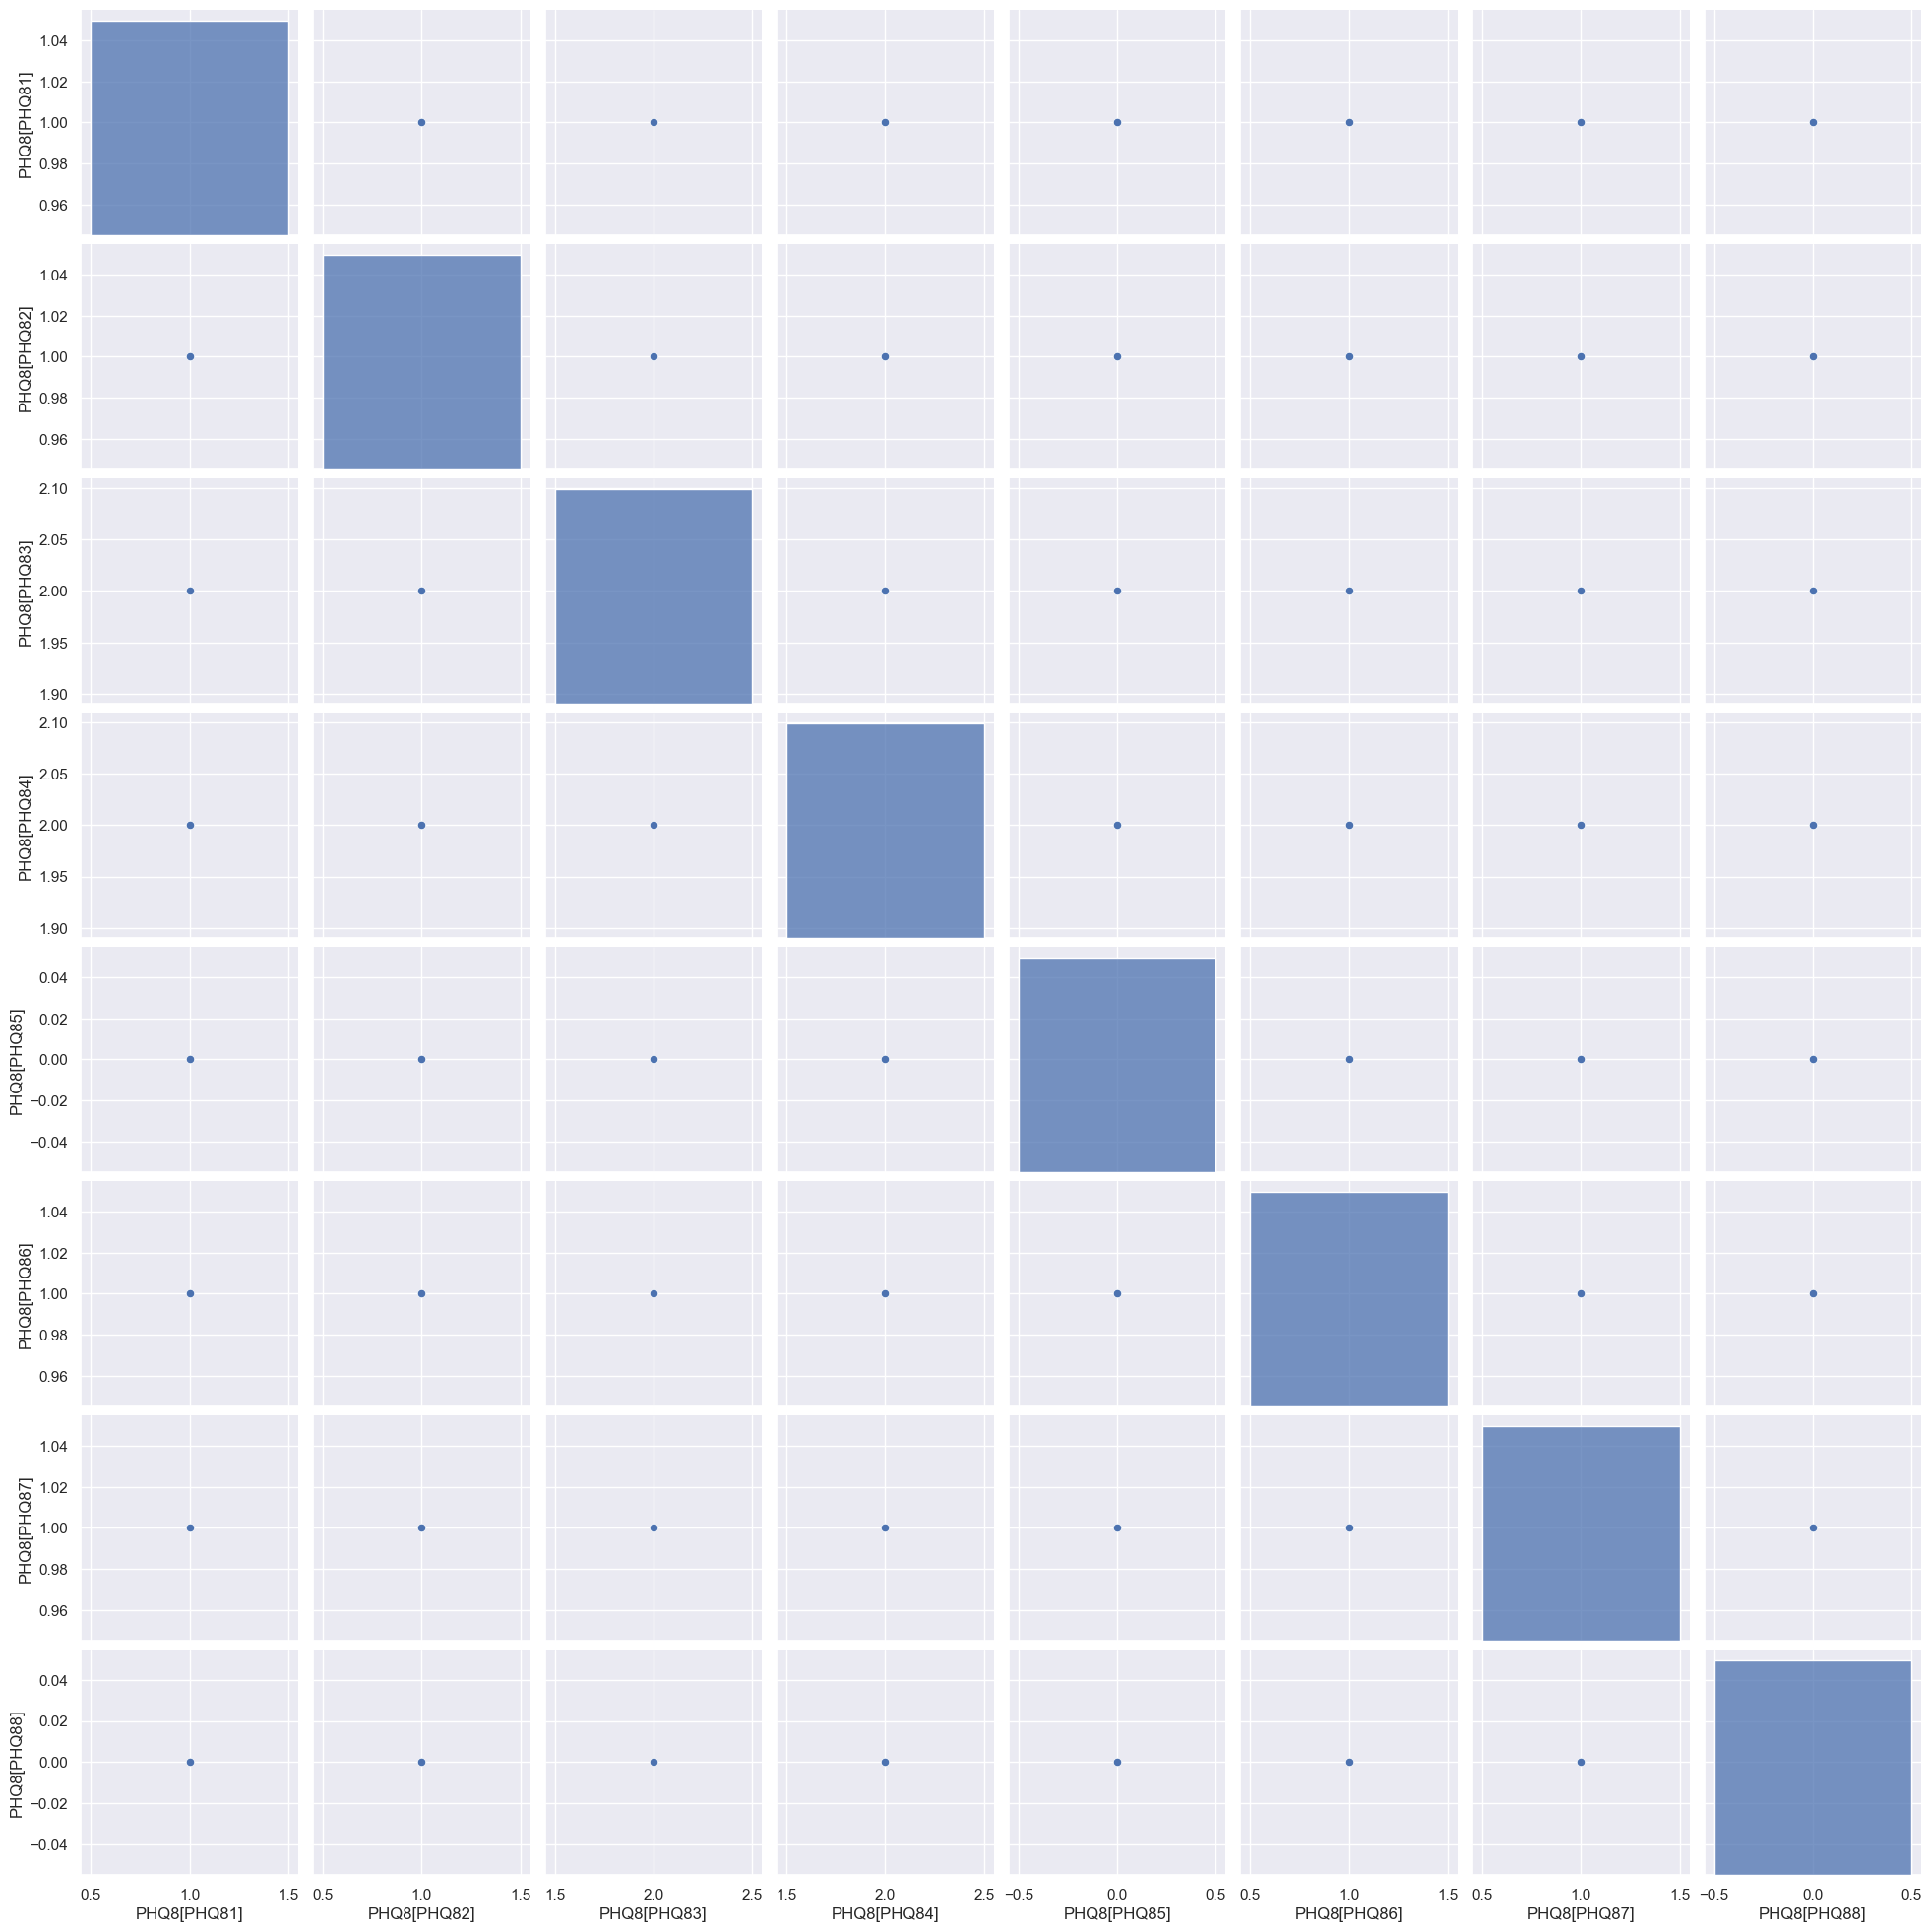

In [18]:
# check out sns.jointplot & sns.pairplot (https://seaborn.pydata.org/tutorial/introduction.html)

sns.pairplot(data=df[['PHQ8[PHQ81]', 'PHQ8[PHQ82]', 'PHQ8[PHQ83]', 'PHQ8[PHQ84]', 'PHQ8[PHQ85]', 'PHQ8[PHQ86]', 'PHQ8[PHQ87]', 'PHQ8[PHQ88]']])

In [19]:
print(df['PCI[PCI01]'][0])
print(df['LOC[LOC01]'][0])
print(df['GSES[GSE01]'][0])
print(df['MAIA2[MAIA01]'][0])
print(df['PSQI4'][0])
print(df['StaitAllQuestions[STAIT01]'][0])
print(df['PHQ8[PHQ81]'][0])
print(df['dsqperson01'][0])

1
4
3
4
1970-01-01 08:00:00
2
1
1993


In [22]:
print(df['PCI[PCI02]'][0]) #sub1
#print(df['PCI[PCI02]'][80]) #sub2 ...

2


&nbsp;
___
# pyHGF


In [5]:
from pyhgf import load_data
from pyhgf.distribution import HGFDistribution
from pyhgf.model import HGF
from pyhgf.response import first_level_binary_surprise

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
u, _ = load_data("binary")

In [9]:
two_levels_hgf = HGF(
    n_levels=2,
    model_type="binary",
    initial_mean={"1": 0.0, "2": 0.5},
    initial_precision={"1": 0.0, "2": 1.0},
    tonic_volatility={"2": -3.0},
)

In [11]:
# Provide new observations
two_levels_hgf = two_levels_hgf.input_data(input_data=u)

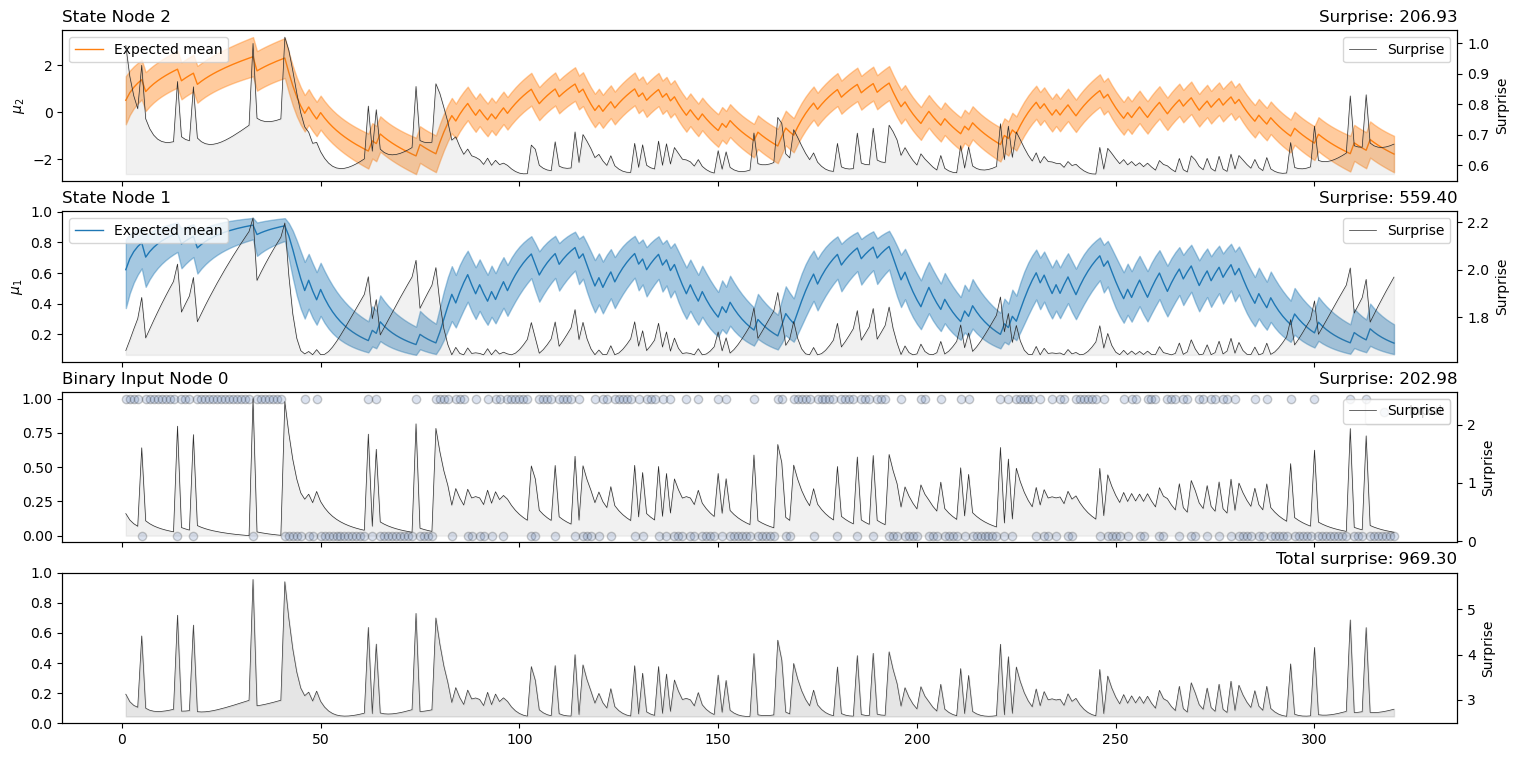

In [12]:
two_levels_hgf.plot_trajectories();

In [13]:
two_levels_hgf.surprise().sum()

Array(202.97632, dtype=float32)

In [16]:
with two_levels_hgf:
    two_level_hgf_idata = pm.sample(chains=2, cores=1)

TypeError: 'HGF' object does not support the context manager protocol